
# Сборный проект - 2


**Цель работы:** Подготовить модель, которая  должна предсказывать коэффициент восстановления золота из золотосодержащей руды. 

**Цель применния** : Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.  

**Исходные данные**: Данные с параметрами добычи и очистки

### Содержание:
* Импорт библиотек и данных. Подготовка данных
* Изменение концентрации металлов (Au, Ag, Pb) на различных этапах очистки
* Построение модели


## Импорт библиотек и данных. Подготовка данных


In [1]:
import pandas as pd
import random
import numpy as np
from IPython.display import Image
from IPython.core.display import HTML
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sb
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyRegressor

import warnings
warnings.filterwarnings('ignore')

In [2]:
data_full= pd.read_csv('gold_recovery_full_new.csv')
data_test= pd.read_csv('gold_recovery_test_new.csv')
data_train= pd.read_csv('gold_recovery_train_new.csv')

for i in data_full,data_test,data_train:
    display(i.head())
    i.info()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


###  Проверка расчета эффективности обогащения

1.Проверю,что эффективность обогащения рассчитана правильно. Вычислю её на обучающей выборке для признака **rougher.output.recovery**.  
2.Найду MAE между моими расчётами и значением признака.  
3.Сделаю вывод

In [3]:
Image(url= "https://pictures.s3.yandex.net/resources/Recovery_1576238822.jpg", width=1000, height=600)

C — доля золота в концентрате после флотации/очистки - ***rougher.output.concentrate_au***  
F — доля золота в сырье/концентрате до флотации/очистки - ***rougher.input.feed_au ***  
T — доля золота в отвальных хвостах после флотации/очистки - ***rougher.output.tail_au***

Напишем функцию для расчета ***Recovery***

In [4]:
# функция для расчета Recovery
def my_recovery_func(C, F, T):
    return((C * (F - T)) / (F * (C - T))) * 100


Для удобства создадим отдельный датафрейм, в который скопируем необходимые данные - ***C, F, T, Recovery***  
Избавимся от пропусков.

In [5]:
calculated_recovery = pd.DataFrame(data_train[['rougher.input.feed_au',
                                               'rougher.output.concentrate_au',
                                               'rougher.output.tail_au',
                                               'rougher.output.recovery']])
calculated_recovery.head()

,rougher.input.feed_au,rougher.output.concentrate_au,rougher.output.tail_au,rougher.output.recovery
0,6.486150,19.793808,1.170244,87.107763
1,6.478583,20.050975,1.184827,86.843261
2,6.362222,19.737170,1.162562,86.842308
3,6.118189,19.320810,1.079755,87.226430
4,5.663707,19.216101,1.012642,86.688794


In [6]:
# удаляем пропуски
calculated_recovery = calculated_recovery[~calculated_recovery['rougher.input.feed_au'].isnull()]
calculated_recovery = calculated_recovery[~calculated_recovery['rougher.output.concentrate_au'].isnull()]
calculated_recovery = calculated_recovery[~calculated_recovery['rougher.output.tail_au'].isnull()]
calculated_recovery = calculated_recovery[~calculated_recovery['rougher.output.recovery'].isnull()]
calculated_recovery.isna().sum()

rougher.input.feed_au            0
rougher.output.concentrate_au    0
rougher.output.tail_au           0
rougher.output.recovery          0
dtype: int64

Применим функцию **my_recovery_func**

In [7]:
calculated_recovery['my_recovery']  = my_recovery_func(data_train['rougher.output.concentrate_au'],
                                                       data_train['rougher.input.feed_au'],
                                                       data_train['rougher.output.tail_au'])
calculated_recovery[['rougher.output.recovery', 'my_recovery']].head()

,rougher.output.recovery,my_recovery
0,87.107763,87.107763
1,86.843261,86.843261
2,86.842308,86.842308
3,87.226430,87.226430
4,86.688794,86.688794


Найду MAE между моими расчётами ***my_recovery*** и значением признака ***rougher.output.recovery***


In [8]:
recovery_mae = mean_absolute_error(
    calculated_recovery['my_recovery'],
    calculated_recovery['rougher.output.recovery'])

print('Средняя абсолютная ошибка : {:.15f}%'.format(recovery_mae))

Средняя абсолютная ошибка : 0.000000000000010%


### Вывод:

Эфективность обогащения рассчитана правильно, МАЕ≃0


 ### Анализ признаков, недоступных в тестовой выборке

Определим разницу в кол-ве столбцов между тренировной и тестовой выборками

In [9]:
train_headers =  data_train.columns
print('Кол-во столбцов в тренировочной выборке:', len(train_headers))
test_headers =  data_test.columns
print('Кол-во столбцов в тестовой выборке:', len(test_headers))
different_columns = train_headers[~train_headers.isin(test_headers)]
print("Разница между кол-вом столбцов:",len(different_columns))

Кол-во столбцов в тренировочной выборке: 87
Кол-во столбцов в тестовой выборке: 53
Разница между кол-вом столбцов: 34


In [10]:
print(pd.Series(different_columns).sort_values().reset_index(drop = True))

0                           final.output.concentrate_ag
1                           final.output.concentrate_au
2                           final.output.concentrate_pb
3                          final.output.concentrate_sol
4                                 final.output.recovery
5                                  final.output.tail_ag
6                                  final.output.tail_au
7                                  final.output.tail_pb
8                                 final.output.tail_sol
9                 primary_cleaner.output.concentrate_ag
10                primary_cleaner.output.concentrate_au
11                primary_cleaner.output.concentrate_pb
12               primary_cleaner.output.concentrate_sol
13                       primary_cleaner.output.tail_ag
14                       primary_cleaner.output.tail_au
15                       primary_cleaner.output.tail_pb
16                      primary_cleaner.output.tail_sol
17                      rougher.calculation.au_p

### Вывод:

**1.Флотация**:  
*Параметры продукта:*   
'rougher.output.concentrate_ag'  
'rougher.output.concentrate_au'  
'rougher.output.concentrate_pb'  
'rougher.output.concentrate_sol'  
'rougher.output.recovery'  
'rougher.output.tail_ag'  
'rougher.output.tail_au'  
'rougher.output.tail_pb'  
'rougher.output.tail_sol'  
*Расчётные характеристики:*  
'rougher.calculation.au_pb_ratio'  
'rougher.calculation.floatbank10_sulfate_to_au_feed'  
'rougher.calculation.floatbank11_sulfate_to_au_feed'  
'rougher.calculation.sulfate_to_au_concentrate'  
**2.Очистка**  
*Первичная очистка:*  
*Параметры продукта:*  
'primary_cleaner.output.concentrate_ag'  
'primary_cleaner.output.concentrate_au'  
'primary_cleaner.output.concentrate_pb'  
'primary_cleaner.output.concentrate_sol'  
'primary_cleaner.output.tail_ag'  
'primary_cleaner.output.tail_au'  
'primary_cleaner.output.tail_pb'  
'primary_cleaner.output.tail_sol'  
*Вторичная очистка:*  
*Параметры продукта:*  
'secondary_cleaner.output.tail_ag'  
'secondary_cleaner.output.tail_au'  
'secondary_cleaner.output.tail_pb'  
'secondary_cleaner.output.tail_sol'  
**3.Финальные характеристики:**  
*Параметры продукта:*  
'final.output.concentrate_ag'  
'final.output.concentrate_au'  
'final.output.concentrate_pb'  
'final.output.concentrate_sol'  
'final.output.recovery'  
'final.output.tail_ag'  
'final.output.tail_au'  
'final.output.tail_pb'  
'final.output.tail_sol'  
 




В тестовой выборке отсутствуют **параметры продукта** на этапах флотации, очистки, финальные параметры и **расчётные характеристики** на этапе флотации.

### Предобработка данных

По заданию нужно спрогнозировать сразу две величины: **rougher.output.recovery**, **final.output.recovery**. Это и есть наши целевые признаки

>Соседние по времени параметры часто похожи.
Некоторые параметры недоступны, потому что замеряются и/или рассчитываются значительно позже. Из-за этого в тестовой выборке отсутствуют некоторые признаки, которые могут быть в обучающей. Также в тестовом наборе нет целевых признаков.
Исходный датасет содержит обучающую и тестовую выборки со всеми признаками>

Избавимся от пропусков в целевых признаках


In [11]:
print("Кол-во пропусков в целевых признаках")
print("Кол-во пропусков **final.output.recovery**:",data_train['rougher.output.recovery'].isnull().sum())
print("Кол-во пропусков **final.output.recovery**:",data_train['final.output.recovery'].isnull().sum())

#удалим пропуски в целевых признаках
data_train = data_train[~data_train['rougher.output.recovery'].isnull()]
data_train = data_train[~data_train['final.output.recovery'].isnull()]
print()

#проверим отсуствие пропусков
print("Кол-во пропусков в целевых признаках после удаления пропусков")
print("Кол-во пропусков **final.output.recovery**:",data_train['rougher.output.recovery'].isnull().sum())
print("Кол-во пропусков **final.output.recovery**:",data_train['final.output.recovery'].isnull().sum())

Кол-во пропусков в целевых признаках
Кол-во пропусков **final.output.recovery**: 0
Кол-во пропусков **final.output.recovery**: 0

Кол-во пропусков в целевых признаках после удаления пропусков
Кол-во пропусков **final.output.recovery**: 0
Кол-во пропусков **final.output.recovery**: 0


Осталось довольно много пропусков в остальных признаках.

In [12]:
data_train.isnull().sum().sort_values(ascending=False)

secondary_cleaner.output.tail_sol           1605
rougher.state.floatbank10_e_air              436
rougher.input.floatbank11_xanthate           428
primary_cleaner.output.concentrate_sol       286
secondary_cleaner.state.floatbank2_a_air     217
                                            ... 
rougher.state.floatbank10_e_level              0
rougher.state.floatbank10_f_air                0
rougher.state.floatbank10_f_level              0
rougher.output.concentrate_pb                  0
date                                           0
Length: 87, dtype: int64

Рассмотрим распределение признака **secondary_cleaner.output.tail_sol**, а так же распределение при  удалении пропусков и замене на среднее

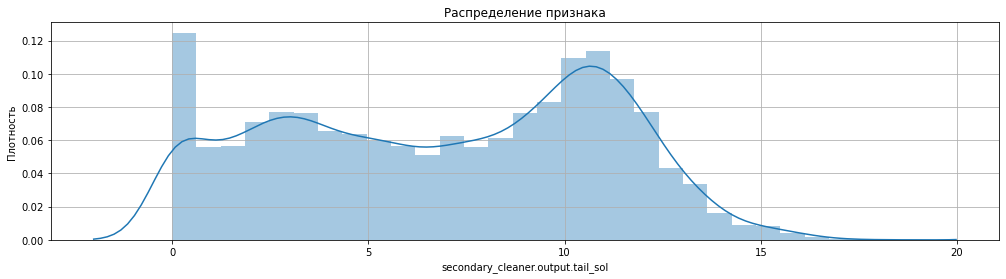

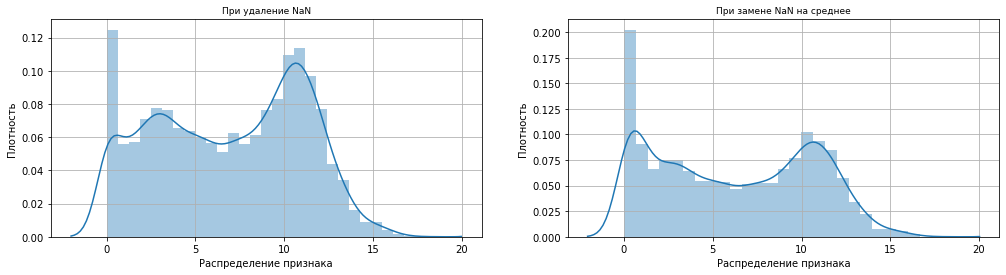

In [13]:
# распределение признака
sb.set_style({'axes.grid': True})
fig, axes=plt.subplots(figsize=(17,4))
data_train1 = data_train.loc[(data_train['secondary_cleaner.output.tail_sol']>= 0)]
sns.distplot(data_train1['secondary_cleaner.output.tail_sol'])
axes.set_ylabel('Плотность')
axes.set_title('Распределение признака')

# распределение при удаление NaN
df1=data_train[data_train['secondary_cleaner.output.tail_sol'].notna()]
fig, axes = plt.subplots(1,2, figsize=(17, 4), sharex=True)
sns.distplot(df1['secondary_cleaner.output.tail_sol'],ax=axes[0])
axes[0].set_xlabel('Распределение признака')
axes[0].set_ylabel('Плотность')
axes[0].set_title('При удаление NaN',fontsize=9)

# распределение при замене NaN на среднее(method = 'ffill')
df2=data_train.fillna(method = 'ffill')
sns.distplot(df2['secondary_cleaner.output.tail_sol'], ax=axes[1])
axes[1].set_xlabel('Распределение признака')
axes[1].set_ylabel('Плотность')
axes[1].set_title('При замене NaN на среднее',fontsize=9)
plt.show()


Выполним замену Nan  методом 'ffill', не смотря на то, что распределение будет не много отличаться.

In [14]:
data_train = data_train.fillna(method = 'ffill')

In [15]:
# В test добавим признаки из таблицы full
data_test = data_test.merge(data_full, on = 'date', how = 'left', suffixes = ('', '_full'))
data_test = data_test.fillna(method = 'ffill')

In [16]:
print("Кол-во пропусков в целевых признаках")
print("Кол-во пропусков **final.output.recovery**:",data_test['rougher.output.recovery'].isnull().sum())
print("Кол-во пропусков **final.output.recovery**:",data_test['final.output.recovery'].isnull().sum())

#удалим пропуски в целевых признаках
data_test = data_test[~data_test['rougher.output.recovery'].isnull()]
data_test = data_test[~data_test['final.output.recovery'].isnull()]
print()

#проверим отсуствие пропусков
print("Кол-во пропусков в целевых признаках после удаления пропусков")
print("Кол-во пропусков **final.output.recovery**:",data_test['rougher.output.recovery'].isnull().sum())
print("Кол-во пропусков **final.output.recovery**:",data_test['final.output.recovery'].isnull().sum())

Кол-во пропусков в целевых признаках
Кол-во пропусков **final.output.recovery**: 0
Кол-во пропусков **final.output.recovery**: 0

Кол-во пропусков в целевых признаках после удаления пропусков
Кол-во пропусков **final.output.recovery**: 0
Кол-во пропусков **final.output.recovery**: 0


In [17]:
print('Кол-во дубликатов:',data_train.duplicated().sum())
print('Кол-во дубликатов:',data_test.duplicated().sum())

Кол-во дубликатов: 0
Кол-во дубликатов: 0



## Изменение концентрации металлов (Au, Ag, Pb) на различных этапах очистки 

1-ый этап - **rougher.input.feed_**-начальный продукт  
2-ой этап - **rougher.output.concentrate_**- после флотации  
3-ий этап - **primary_cleaner.output.concentrate_**- после 1-ой очистки  
4-ый этап - **final_output_concentrate**- после финальной очистки

Создадим функцию, котораю будет создавать df для каждого этапа очистки, с дальнейшим построением распределения

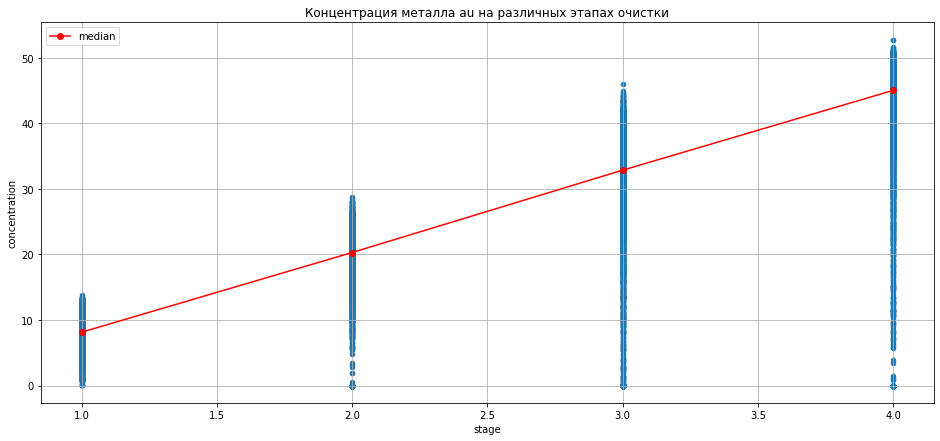

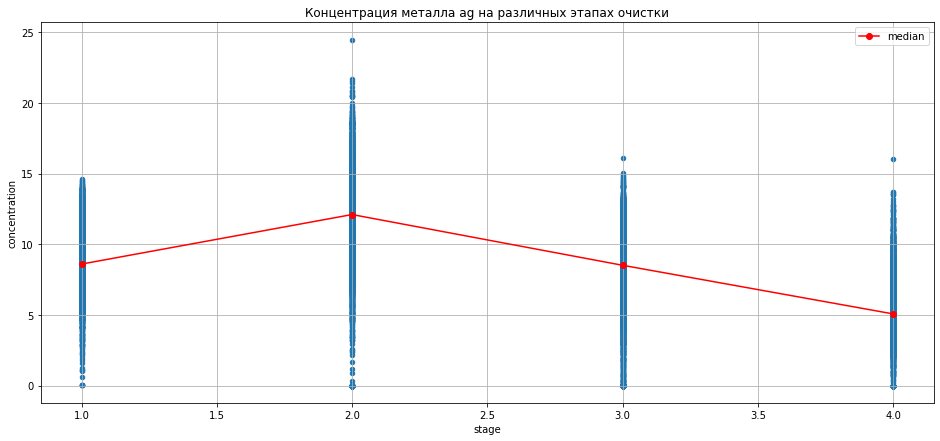

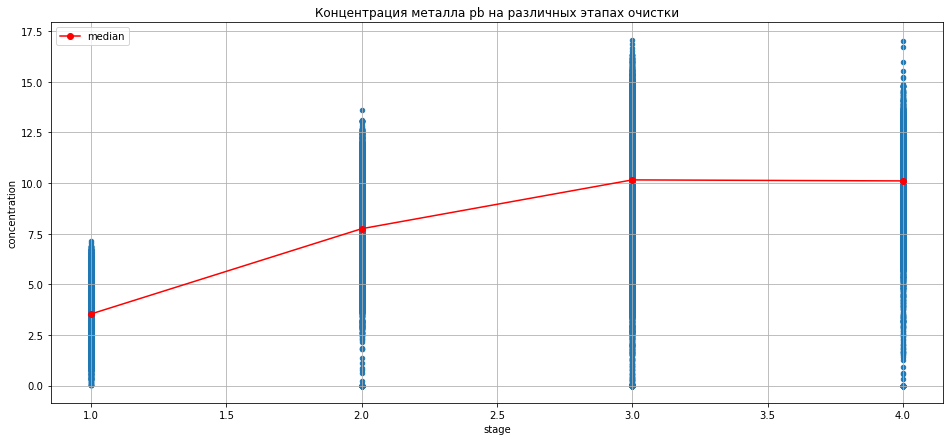

In [18]:
def conc():
    metall = ['au','ag','pb']
    for i in metall:
        #1 этап
        data_concentration_1= data_full[['rougher.input.feed_'+i]]
        data_concentration_1['stage'] = int(1)
        data_concentration_1.columns = ['concentration', 'stage']
        #2 этап
        data_concentration_2 = data_full[['rougher.output.concentrate_'+i]]
        data_concentration_2['stage'] = int(2)
        data_concentration_2.columns = ['concentration', 'stage']
        #3 этап
        data_concentration_3 = data_full[['primary_cleaner.output.concentrate_'+i]]
        data_concentration_3['stage'] = int(3)
        data_concentration_3.columns = ['concentration', 'stage']
        #4 тап
        data_concentration_4 = data_full[['final.output.concentrate_'+i]]
        data_concentration_4['stage'] = int(4)
        data_concentration_4.columns = ['concentration', 'stage']

        # Соберем все вместе
        data_concentration_all = (data_concentration_1.append(data_concentration_2).append(data_concentration_3).append(data_concentration_4))
    
        ax=data_concentration_all.plot(x='stage', y='concentration', kind='scatter', figsize=(16,7), grid=True)
        data_concentration_all.groupby('stage')['concentration'].agg(['median']).plot(ax = ax,style = '-or',legend = True, label = 'median',grid=True)
        plt.title('Концентрация металла '+i+' на различных этапах очистки')
conc()

### Вывод

* Концентрация золота растет с каждым этапом
* Концентрация серебра начинает падать после этапа флотации
* Концентрация свинца практически не меняется на этапах первичной и финальной очистки



### Сравнение распределения размеров гранул сырья на обучающей и тестовой выборках

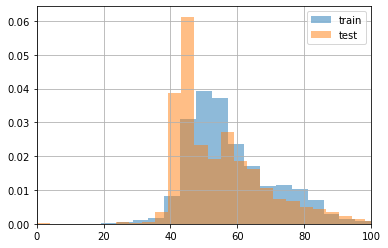

In [19]:
plt.hist(data_train['rougher.input.feed_size'], bins = 100, alpha = 0.5,
         label = 'train', density = True)
plt.hist(data_test['rougher.input.feed_size'], bins = 100, alpha = 0.5, 
         label = 'test', density = True)
plt.legend()
plt.xlim(0, 100)
plt.show()

(0.0, 100.0)

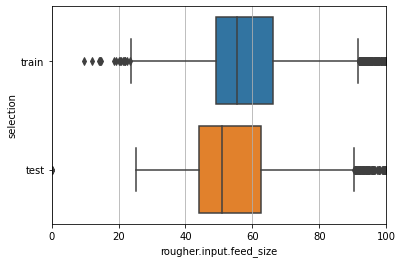

In [20]:
data_train_for_boxplot = pd.DataFrame.copy(data_train, deep=True)
data_train_for_boxplot['selection'] = 'train'

data_test_for_boxplot = pd.DataFrame.copy(data_test, deep=True)
data_test_for_boxplot['selection'] = 'test'
data_merged = (data_train_for_boxplot.append(data_test_for_boxplot))

sns.boxplot(y='selection',
             x='rougher.input.feed_size',
             data=data_merged)
plt.xlim(0,100)


In [21]:
print(data_train['rougher.input.feed_size'].mean())
print(data_test['rougher.input.feed_size'].mean())

60.23985599255735
55.95275402889511


Распределение отличается, но не критично.  
Тренировочная выборка смещена относительно тестовой.  
Среднее значение тренировной выборки отличается на 5 единиц от среднего значения тестовой.

###  Исследуйте суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.

In [22]:
data_train['rougher_all'] = (data_train['rougher.output.concentrate_ag']
                             + data_train['rougher.output.concentrate_pb']
                             + data_train['rougher.output.concentrate_sol']
                             + data_train['rougher.output.concentrate_au']
                             
                             + data_train['rougher.output.tail_ag']
                             + data_train['rougher.output.tail_pb']
                             + data_train['rougher.output.tail_sol']
                             + data_train['rougher.output.tail_au'])

data_train['primary_cleaner_all'] = (data_train['primary_cleaner.output.concentrate_ag']
                                    + data_train['primary_cleaner.output.concentrate_pb']
                                    + data_train['primary_cleaner.output.concentrate_sol']
                                    + data_train['primary_cleaner.output.concentrate_au']
                                     
                                    + data_train['primary_cleaner.output.tail_ag']
                                    + data_train['primary_cleaner.output.tail_pb']
                                    + data_train['primary_cleaner.output.tail_sol']
                                    + data_train['primary_cleaner.output.tail_au'])

data_train['final_all'] = (data_train['final.output.concentrate_ag']
                           + data_train['final.output.concentrate_pb']
                           + data_train['final.output.concentrate_sol']
                           + data_train['final.output.concentrate_au']
                           
                           + data_train['final.output.tail_ag']
                           + data_train['final.output.tail_pb']
                           + data_train['final.output.tail_sol']
                           + data_train['final.output.tail_au'])

 

display(data_train[['rougher_all', 'primary_cleaner_all', 'final_all']].head())

,rougher_all,primary_cleaner_all,final_all
0,92.266237,99.695116,93.999250
1,92.654840,100.930566,94.207296
2,91.464763,100.600098,94.238680
3,91.360518,88.048286,93.559658
4,91.256684,99.740522,93.738774


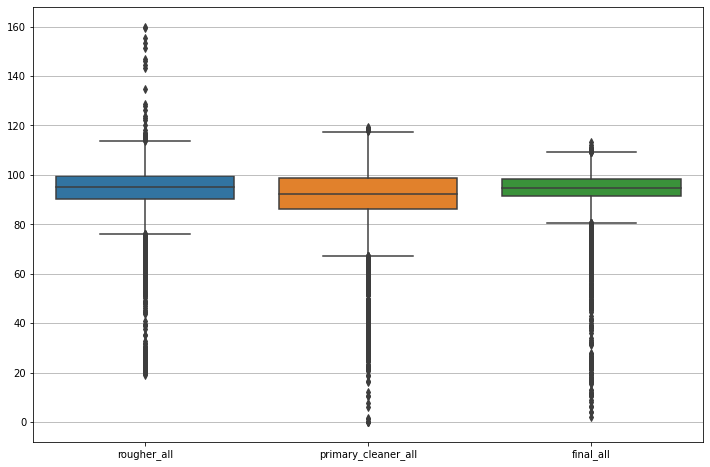

In [23]:
plt.figure(figsize = (12, 8))
sns.boxplot(data = data_train[['rougher_all', 'primary_cleaner_all', 'final_all']])
plt.show()

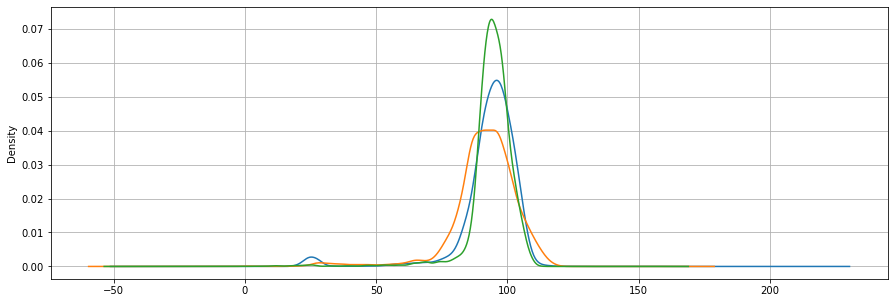

In [24]:
data_train['rougher_all'].plot(kind = 'kde', figsize = (15,5), label = 'raw concentrate')
data_train['primary_cleaner_all'].plot(kind = 'kde', figsize = (15,5), label = 'raw concentrate')
data_train['final_all'].plot(kind = 'kde', figsize = (15,5), label = 'raw concentrate')

In [25]:
data_train.shape

(14149, 90)

Удалим выбросы

In [26]:
column =  data_train[['rougher_all', 'primary_cleaner_all', 'final_all']]
for i in column :
    q25 = data_train[i].quantile(q = 0.25)
    
    q75 = data_train[i].quantile(q = 0.75)
   
    lower_border = q25 - 1.5 * (q75 - q25)
    
    high_border = q75 + 1.5 * (q75 - q25)
    
    data_train=data_train.loc[(data_train[i]>=lower_border ) & (data_train[i]<=high_border)]

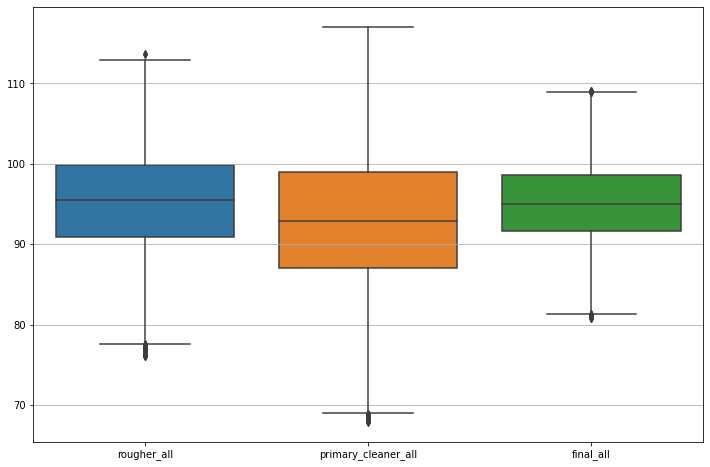

In [27]:
plt.figure(figsize = (12, 8))
sns.boxplot(data = data_train[['rougher_all', 'primary_cleaner_all', 'final_all']])
plt.show()

In [28]:
data_train.shape

(12608, 90)

In [29]:
# Удалим колонки, которые добавили ранее
data_train = data_train.drop(['rougher_all', 'primary_cleaner_all', 'final_all'], axis = 'columns')

## Построение модели 

#### 1. Функция для вычисления итоговой sMAPE.  
#### 2. Обучение разных моделей и оценка их качества. Оценка качества лучшей модели.  
#### 3. Выводы

Приведем **data_train** и **data_test** к единому стандарту для дальнейшего обучения модели
* удалим столбец ***date***
* добавим целевые признаки в ***data_test***

In [30]:
different_columns = pd.Series(different_columns).sort_values().reset_index(drop = True)
print(" Список столбов, которые есть в **data_train** и  нет **data_test**:\n", different_columns)


 Список столбов, которые есть в **data_train** и  нет **data_test**:
 0                           final.output.concentrate_ag
1                           final.output.concentrate_au
2                           final.output.concentrate_pb
3                          final.output.concentrate_sol
4                                 final.output.recovery
5                                  final.output.tail_ag
6                                  final.output.tail_au
7                                  final.output.tail_pb
8                                 final.output.tail_sol
9                 primary_cleaner.output.concentrate_ag
10                primary_cleaner.output.concentrate_au
11                primary_cleaner.output.concentrate_pb
12               primary_cleaner.output.concentrate_sol
13                       primary_cleaner.output.tail_ag
14                       primary_cleaner.output.tail_au
15                       primary_cleaner.output.tail_pb
16                      primary_cl

In [31]:
#Удалим из списка целевые признаки
different_columns=different_columns.drop(different_columns.index[[4,25]]).reset_index(drop = True)

In [32]:
data_train = data_train.drop(different_columns, axis='columns')
data_train = data_train.drop(['date'], axis='columns')
data_test = data_test.loc[:, list(data_train.columns)]

In [33]:
print('Размер data_train:', data_train.shape)
print('Размер data_test:', data_test.shape)

Размер data_train: (12608, 54)
Размер data_test: (5290, 54)


Теперь ***data_train*** и ***data_test*** имеют одинаковые столбцы и не будет конфликта при обучении модели

Объьявим две переменные:
features  — запишим в неё признаки;
target  — целевой признак

In [34]:
features_train=data_train.drop(['rougher.output.recovery','final.output.recovery'],axis=1)
target_train_rougher=data_train['rougher.output.recovery']
target_train_final=data_train['final.output.recovery']

features_test=data_test.drop(['rougher.output.recovery','final.output.recovery'],axis=1)
target_test_rougher=data_test['rougher.output.recovery']
target_test_final=data_test['final.output.recovery']

###  1. Функция для вычисления итоговой sMAPE

In [35]:
Image(url= "https://pictures.s3.yandex.net/resources/smape_1576239058.jpg", width=1000, height=600)

In [36]:
def sMAPE(y_actual,y_predicted):
    sMAPE = np.mean(abs(y_actual - y_predicted)/((abs(y_actual)+abs(y_predicted))/2))*100
    return sMAPE

In [37]:
Image(url= "https://pictures.s3.yandex.net/resources/_smape_1576239054.jpg", width=1000, height=600)

In [38]:
def final_sMAPE(sMAPE_rougher,sMAPE_final):
    return (0.25*sMAPE_rougher + 0.75*sMAPE_final)

### 2. Обучение разных моделей и оценка их качества. Оценка качества лучшей модели

Обучение будем проводить на двух моделях МО: **RandomForestRegressor** и **DecisionTreeRegressor**

In [39]:
model_RFR = RandomForestRegressor(random_state=42)
model_DTR = DecisionTreeRegressor(random_state=42)

Определение гиперпараметров для моделей

In [40]:
param_RFR = {"n_estimators":[5,100],
             "max_depth":[1,10],
             "max_features":[1,10]}
param_DTR = {"max_depth":[1,10],
             "max_features":[1,10]}

Обучение моделей

In [41]:
scoring_my = make_scorer(sMAPE,greater_is_better=False)

RFR_rougher = (GridSearchCV(model_RFR,param_grid = param_RFR,cv=3,scoring = scoring_my))
RFR_final = (GridSearchCV(model_RFR,param_grid = param_RFR,cv=3,scoring = scoring_my))

DTR_rougher = (GridSearchCV(model_DTR,param_grid = param_DTR,cv=3,scoring = scoring_my))
DTR_final = (GridSearchCV(model_DTR,param_grid = param_DTR,cv=3,scoring =scoring_my))

In [42]:
RFR_rougher.fit(features_train,target_train_rougher)
RFR_final.fit(features_train, target_train_final)

DTR_rougher.fit(features_train,target_train_rougher)
DTR_final.fit(features_train, target_train_final)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [1, 10], 'max_features': [1, 10]},
             scoring=make_scorer(sMAPE, greater_is_better=False))

In [43]:
RFR_rougher_best_score = RFR_rougher.best_score_ 
RFR_final_best_score = RFR_final.best_score_
DTR_rougher_best_score = DTR_rougher.best_score_
DTR_final_best_score = DTR_final.best_score_

In [44]:
print("RandomForestRegressor:",RFR_rougher_best_score,"DecisionTreeRegressor:",DTR_rougher_best_score)
print("RandomForestRegressor:",RFR_final_best_score,"DecisionTreeRegressor:",DTR_final_best_score)

RandomForestRegressor: -7.092759646479588 DecisionTreeRegressor: -8.386232251346376
RandomForestRegressor: -9.461131695252229 DecisionTreeRegressor: -9.694137330227111


**Итоговая sMAPE на тренировочных данных**

RandomForestRegressor

In [45]:
final_sMAPE(RFR_rougher_best_score,RFR_final_best_score)

-8.869038683059069

DecisionTreeRegressor

In [46]:
final_sMAPE(DTR_rougher_best_score,DTR_final_best_score)

-9.367161060506927

RandomForest справляется лучше, будем использовать ее

**Итоговая sMAPE на тестовых данных**

In [47]:
RFR_rougher_test=RFR_rougher.predict(features_test)
RFR_final_test=RFR_final.predict(features_test)

In [48]:
final_sMAPE(sMAPE(target_test_rougher,RFR_rougher_test),sMAPE(target_test_final,RFR_final_test))

9.01244430824348

### Сравнение итоговой относительно константной модели

In [49]:
model_const_rouhger_med = DummyRegressor(strategy="median")
model_const_final_med = DummyRegressor(strategy="median")

model_const_rouhger_med.fit(features_train,target_train_rougher)
model_const_final_med.fit(features_train,target_train_final)


DummyRegressor(strategy='median')

In [50]:
model_const_rouhger_pred_med = model_const_rouhger_med.predict(features_test)
model_const_final_pred_med = model_const_final_med.predict(features_test)

In [51]:
print('Ошибка на констатной модели:',final_sMAPE(sMAPE(target_test_rougher,model_const_rouhger_pred_med),sMAPE(target_test_final,model_const_final_pred_med)))

Ошибка на констатной модели: 9.480080081946731


# Выводы:
Параметр **recovery** верен  
Модель построена на модели МО - ***RandomForestRegressor***  
Ошибка на тестовой выборке:9.01 меньше ошибки относительно константной модели